In [3]:
%load_ext autoreload
%autoreload 2

# EDA Flujo Vehicular en Buenos Aires
1.	Genere una exploración de datos que permita la comprensión de los mismos (gráficos, medidas de tendencia central, mapas). Tenga en cuenta que muchas personas de negocio mirarán su informe por lo cual deberá facilitarles la comprensión del estado de situación


In [4]:
##importa librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import test_talent.utils.paths as path
from test_talent.utils.talent_utils import check_quality, replace_date, rm_outliers
# pd.options.display.float_format = '{:,.2f}'.format

/home/frandak2/miniconda3/envs/test_talent/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Para este analisis usaremos los datos del flujo vehicular por radar en la ciudad de buenos aires para el anio 2022

Para explorar los datos y facilitar la comprensión, Vamos a utilizar los siguientes métodos y gráficos:

1. Examianr el dataset, cantidad de NA, datos duplicados, limpieza de estos, y fechas sin datos

2.Análisis de la frecuencia de las columnas Aut_Nombre y Disp_Nombre para identificar las principales autoridades y dispositivos que se encuentran en el dataset.

Gráficos de barras para visualizar la distribución de la cantidad de vehículos por día de la semana, hora del día y sección sentido.

Histograma para visualizar la distribución de la cantidad de vehículos por día.

Gráficos de boxplot para identificar los valores atípicos en la cantidad de vehículos por día y hora.

Mapas interactivos que muestren la ubicación de los dispositivos y su relación con la cantidad de vehículos.

Gráficos de línea para visualizar la tendencia de la cantidad de vehículos a lo largo del tiempo.

Medidas de tendencia central, como la media y la desviación estándar, para entender el comportamiento de la cantidad de vehículos en general.

Además, es importante proporcionar una breve descripción textual de los resultados de cada análisis, para que las personas de negocios puedan comprender fácilmente la situación actual y tomar decisiones informadas.

In [5]:
# Leemos el archivo de datos
df = pd.read_csv(path.data_raw_dir('flujo-vehicular-por-radares-2022.csv'))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87845 entries, 0 to 87844
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Día.Mes.Año de H_Fecha  87124 non-null  object 
 1   Hora de H_Fecha         87124 non-null  float64
 2   Aut Nombre              87124 non-null  object 
 3   Disp Nombre             87124 non-null  object 
 4   Disp Ubicacion          87124 non-null  float64
 5   Seccion Sentido         87124 non-null  object 
 6   Disp Lat                87124 non-null  float64
 7   Disp Lng                87124 non-null  float64
 8   H_Cant_Veh              87124 non-null  float64
dtypes: float64(5), object(4)
memory usage: 6.0+ MB


In [6]:
df.sample(10)

,Día.Mes.Año de H_Fecha,Hora de H_Fecha,Aut Nombre,Disp Nombre,Disp Ubicacion,Seccion Sentido,Disp Lat,Disp Lng,H_Cant_Veh
79665,24/11/2022,6.0,AU Dellepiane,RD100 Montiel,0.40,A,-34.68411,-58.48264,5.244
65360,22/10/2022,2.0,AU Dellepiane,RD113 Ingreso DELL2,4.60,A,-34.65061,-58.46643,20.000
83648,17/11/2022,16.0,AU Dellepiane,RD106 Zinny,3.88,B,-34.65465,-58.46901,4037.000
49579,23/10/2022,23.0,AU 5 Cantilo,RD182 Labruna,8.70,B,-34.54362,-58.44869,2.961
11568,23/01/22,1.0,AU 9 de Julio Sur,RD131 Brandsen B,1.63,B,-34.63898,-58.37695,1065.000
80730,16/11/2022,14.0,AU Dellepiane,RD101 de la Torre,1.00,B,-34.67917,-58.47959,3375.000
1632,07/01/22,10.0,AU 4 Lugones,RD168 Juramento,7.20,A,-34.54977,-58.43602,6292.000
60327,14/10/2022,13.0,AU Dellepiane,RD103 Miralla,2.10,B,-34.66990,-58.47536,4.359
57060,26/10/2022,8.0,AU 9 de Julio Sur,RD125 Osv.Cruz A,0.16,A,-34.62277,-58.37255,3.460
9233,17/01/22,21.0,AU 9 de Julio Sur,RD128 Ben.Q.Martín B,1.05,B,-34.64358,-58.37592,1692.000


## verificacion de calidad de datos

In [7]:
check_quality(df)


Valores NA por columna:
Día.Mes.Año de H_Fecha    721
Hora de H_Fecha           721
Aut Nombre                721
Disp Nombre               721
Disp Ubicacion            721
Seccion Sentido           721
Disp Lat                  721
Disp Lng                  721
H_Cant_Veh                721
dtype: int64

Cantidad de datos duplicados:
3271

Valores únicos por columna:
Día.Mes.Año de H_Fecha      120
Hora de H_Fecha              24
Aut Nombre                    4
Disp Nombre                  26
Disp Ubicacion               23
Seccion Sentido               2
Disp Lat                     25
Disp Lng                     26
H_Cant_Veh                14886
dtype: int64


In [8]:
# Eliminamos valores NA
df.dropna(subset='H_Cant_Veh', inplace=True)
# Eliminamos la columna que no neesitamos
# df.drop(columns=['Hora de H_Fecha','Disp Ubicacion'], inplace=True)
# Eliminamos valores datos duplicados
df.drop_duplicates(inplace=True)

In [9]:
check_quality(df)

Valores NA por columna:
Día.Mes.Año de H_Fecha    0
Hora de H_Fecha           0
Aut Nombre                0
Disp Nombre               0
Disp Ubicacion            0
Seccion Sentido           0
Disp Lat                  0
Disp Lng                  0
H_Cant_Veh                0
dtype: int64

Cantidad de datos duplicados:
0

Valores únicos por columna:
Día.Mes.Año de H_Fecha      120
Hora de H_Fecha              24
Aut Nombre                    4
Disp Nombre                  26
Disp Ubicacion               23
Seccion Sentido               2
Disp Lat                     25
Disp Lng                     26
H_Cant_Veh                14886
dtype: int64


In [10]:
# Verificamos el tipo de datos en cada columna
print("\nTipo de datos por columna:")
print(df.dtypes)


Tipo de datos por columna:
Día.Mes.Año de H_Fecha     object
Hora de H_Fecha           float64
Aut Nombre                 object
Disp Nombre                object
Disp Ubicacion            float64
Seccion Sentido            object
Disp Lat                  float64
Disp Lng                  float64
H_Cant_Veh                float64
dtype: object


In [11]:
df.columns = ['Fecha','Hora','Auto_Nombre','Dispo_Nombre','Disp_Ubicacion','Seccion_Sentido','Disp_Lat','Disp_Lng','Cant_Veh']
df.sample(5)

,Fecha,Hora,Auto_Nombre,Dispo_Nombre,Disp_Ubicacion,Seccion_Sentido,Disp_Lat,Disp_Lng,Cant_Veh
81274,27/11/2022,22.0,AU Dellepiane,RD101 de la Torre,1.00,B,-34.67917,-58.47959,1.777
72783,1/11/2022,11.0,AU 9 de Julio Sur,RD134 Ituzaingo,2.43,B,-34.65136,-58.37861,3.537
27714,15/02/22,0.0,AU 5 Cantilo,RD182 Labruna,8.70,B,-34.54230,-58.44869,1983.000
872,06/01/22,13.0,AU 4 Lugones,RD166 Ombues,5.50,A,-34.56044,-58.41908,5956.000
22008,01/02/22,6.0,AU 4 Lugones,RD165 Dorrego,4.74,A,-34.56336,-58.41529,4395.000


In [10]:
# arreglar la fecha
df['Fecha'] = df['Fecha'].apply(replace_date)
# covertir a formato fecha
df['Fecha'] = pd.to_datetime(df["Fecha"], format='%d/%m/%Y')
# creamos una variable para ayudarnos a hacer el analisis
df["Dia"] = df["Fecha"].dt.day_name()
df["Mes"] = df["Fecha"].dt.month_name()
#cambio a variables categoricas
cols = ['Hora','Auto_Nombre','Dispo_Nombre','Dispo_Ubicacion','Seccion_Sentido', 'Dia']
for col in cols:
    df[col] = df[col].astype('category')

In [11]:
# Verificamos la descripción estadística de las columnas numéricas
print("\nDescripción estadística:")
df.describe(include='all')


Descripción estadística:


/tmp/ipykernel_15480/2135437584.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,Fecha,Hora,Auto_Nombre,Dispo_Nombre,Dispo_Ubicacion,Seccion_Sentido,Disp_Lat,Disp_Lng,Cant_Veh,Dia,Mes
count,84573,84573.0,84573,84573,84573.0,84573,84573.000000,84573.000000,84573.000000,84573,84573
unique,120,24.0,4,26,23.0,2,NaN,NaN,NaN,7,4
top,2022-10-07 00:00:00,12.0,AU Dellepiane,RD101 de la Torre,2.1,B,NaN,NaN,NaN,Monday,January
freq,742,3540.0,32408,5742,5742.0,43190,NaN,NaN,NaN,12749,22002
first,2022-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2022-11-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,-34.618236,-58.435528,1713.021758,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,0.052885,0.040439,2042.374846,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,-34.684110,-58.482640,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,-34.654650,-58.469010,6.502000,NaN,NaN


In [12]:
df.sample(5)

,Fecha,Hora,Auto_Nombre,Dispo_Nombre,Dispo_Ubicacion,Seccion_Sentido,Disp_Lat,Disp_Lng,Cant_Veh,Dia,Mes
76180,2022-11-21,15.0,AU 9 de Julio Sur,RD130 Suarez,1.16,A,-34.63940,-58.37635,2.001,Monday,November
48203,2022-10-28,4.0,AU 4 Lugones,RD165 Dorrego,4.74,A,-34.53767,-58.41529,1.087,Friday,October
53367,2022-10-20,21.0,AU 9 de Julio Sur,RD136 Yrigoyen,3.57,B,-34.64358,-58.37825,965.000,Thursday,October
37618,2022-02-16,7.0,AU Dellepiane,RD103 Miralla,2.10,A,-34.66990,-58.47536,5709.000,Wednesday,February
34158,2022-02-27,10.0,AU 9 de Julio Sur,RD136 Yrigoyen,3.57,B,-34.62277,-58.37825,745.000,Sunday,February


### Gráficos de boxplot para identificar los valores atípicos en la cantidad de vehículos por día y hora

/home/frandak2/miniconda3/envs/test_talent/lib/python3.10/site-packages/seaborn/categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)
/home/frandak2/miniconda3/envs/test_talent/lib/python3.10/site-packages/seaborn/categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)


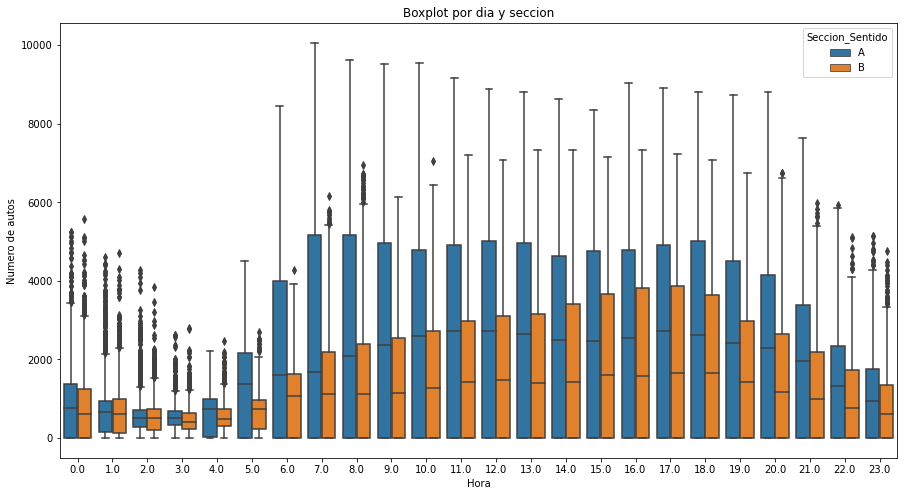

In [13]:
plt.figure(figsize = (15, 8))
sns.boxplot(data = df,x="Hora", y="Cant_Veh",hue='Seccion_Sentido')
plt.xlabel('Hora')
plt.ylabel('Numero de autos')
plt.title('Boxplot por dia y seccion')
plt.show()

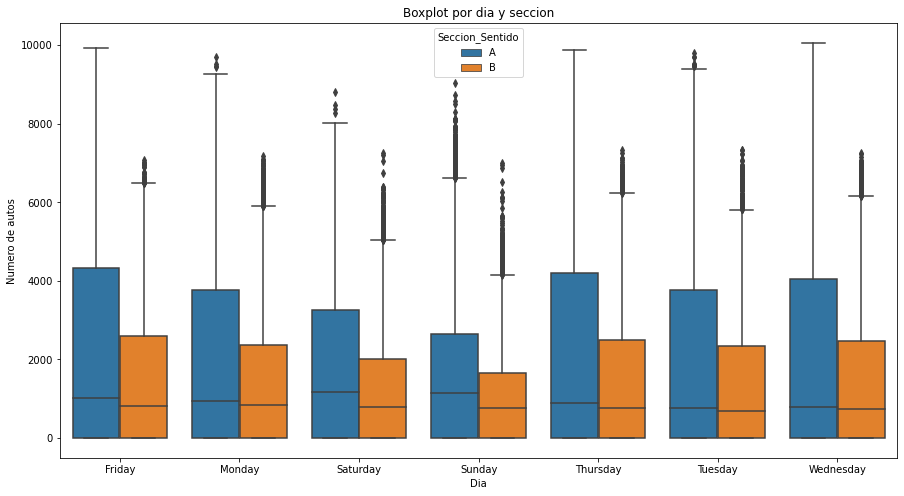

In [14]:
# Gráficos de boxplot para identificar los valores atípicos en la cantidad de vehículos por día y hora
plt.figure(figsize = (15, 8))
sns.boxplot(data = df,x="Dia", y="Cant_Veh",hue='Seccion_Sentido')
plt.xlabel('Dia')
plt.ylabel('Numero de autos')
plt.title('Boxplot por dia y seccion')
plt.show()

In [15]:
df = rm_outliers(df,'Cant_Veh')

/home/frandak2/miniconda3/envs/test_talent/lib/python3.10/site-packages/seaborn/categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)
/home/frandak2/miniconda3/envs/test_talent/lib/python3.10/site-packages/seaborn/categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)


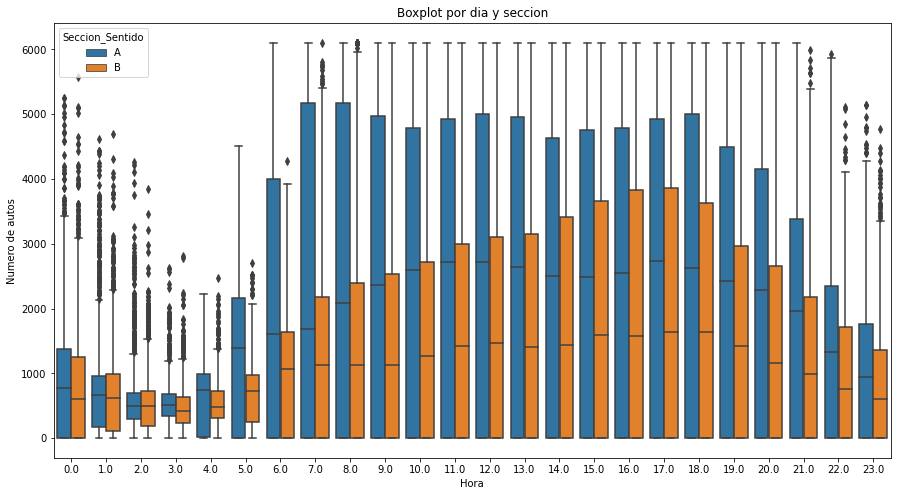

In [16]:
plt.figure(figsize = (15, 8))
sns.boxplot(data = df,x="Hora", y="Cant_Veh",hue='Seccion_Sentido')
plt.xlabel('Hora')
plt.ylabel('Numero de autos')
plt.title('Boxplot por dia y seccion')
plt.show()

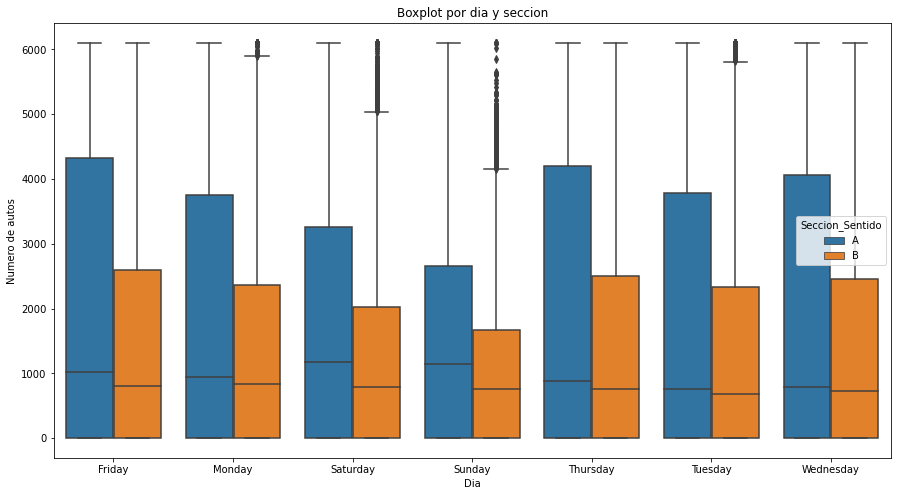

In [17]:
# Gráficos de boxplot para identificar los valores atípicos en la cantidad de vehículos por día y hora
plt.figure(figsize = (15, 8))
sns.boxplot(data = df,x="Dia", y="Cant_Veh",hue='Seccion_Sentido')
plt.xlabel('Dia')
plt.ylabel('Numero de autos')
plt.title('Boxplot por dia y seccion')
plt.show()

## Analisis de datos

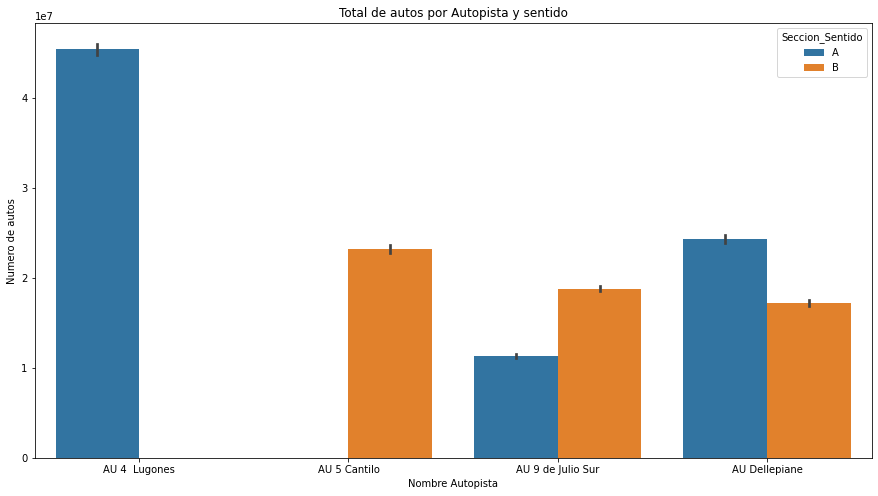

In [18]:
plt.figure(figsize = (15, 8))
sns.barplot(data = df,x='Auto_Nombre', y='Cant_Veh',hue='Seccion_Sentido',estimator=sum)
plt.xlabel('Nombre Autopista')
plt.ylabel('Numero de autos')
plt.title('Total de autos por Autopista y sentido')
plt.show()


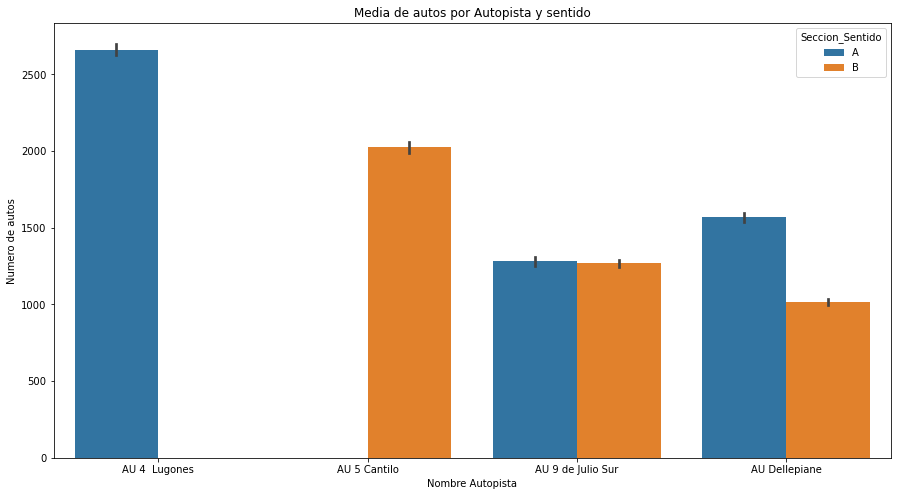

In [19]:
plt.figure(figsize = (15, 8))
sns.barplot(data = df,x='Auto_Nombre', y='Cant_Veh',hue='Seccion_Sentido')
plt.xlabel('Nombre Autopista')
plt.ylabel('Numero de autos')
plt.title('Media de autos por Autopista y sentido')
plt.show()

Observamso que hay datos faltantes para autopistas en secciones especificas, lo que puede dificultar la precision de una futura prediccion de cantidad de autos

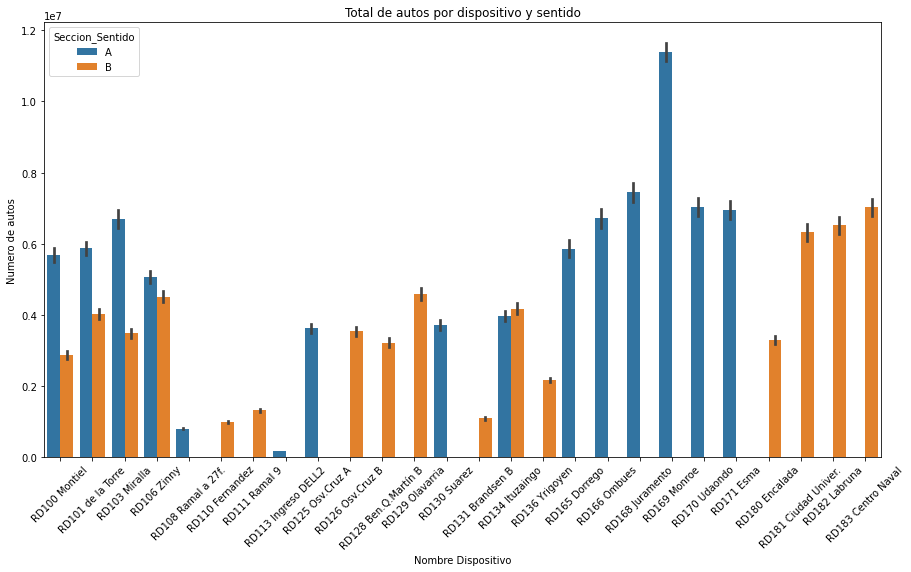

In [20]:
#data
plt.figure(figsize = (15, 8))
sns.barplot(data = df,x='Dispo_Nombre', y='Cant_Veh',hue='Seccion_Sentido',estimator=sum)
plt.xlabel('Nombre Dispositivo')
plt.ylabel('Numero de autos')
plt.title('Total de autos por dispositivo y sentido')
plt.xticks(rotation=45)
plt.show()


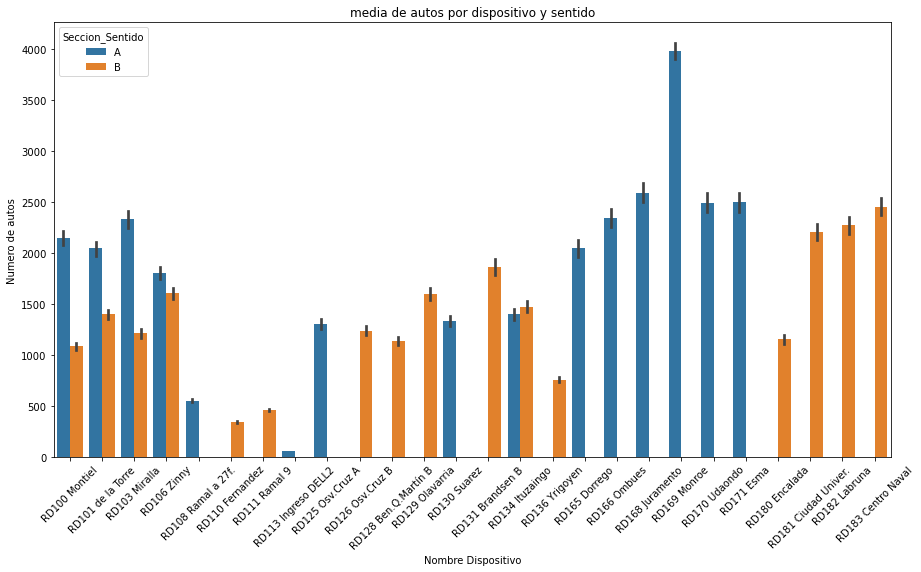

In [21]:
#data
plt.figure(figsize = (15, 8))
sns.barplot(data = df,x='Dispo_Nombre', y='Cant_Veh',hue='Seccion_Sentido')
plt.xlabel('Nombre Dispositivo')
plt.ylabel('Numero de autos')
plt.title('media de autos por dispositivo y sentido')
plt.xticks(rotation=45)
plt.show()

Analisis

# Gráficos de barras para visualizar la distribución de la cantidad de vehículos por día de la semana, hora del día y sección sentido


analisis

/home/frandak2/miniconda3/envs/test_talent/lib/python3.10/site-packages/seaborn/categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)
/home/frandak2/miniconda3/envs/test_talent/lib/python3.10/site-packages/seaborn/categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)


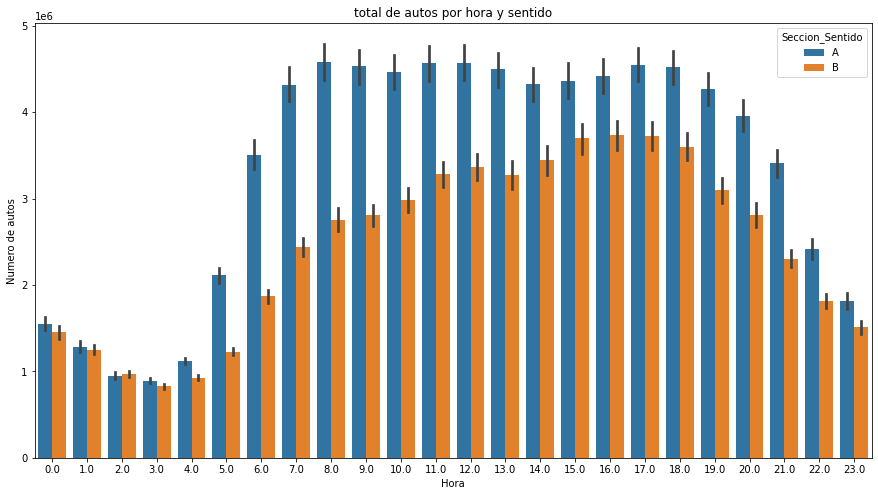

In [22]:
plt.figure(figsize = (15, 8))
sns.barplot(data = df,x='Hora', y='Cant_Veh',hue='Seccion_Sentido',estimator=sum)
plt.xlabel('Hora')
plt.ylabel('Numero de autos')
plt.title('total de autos por hora y sentido')
# plt.xticks(rotation=45)
plt.show()

/home/frandak2/miniconda3/envs/test_talent/lib/python3.10/site-packages/seaborn/categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)
/home/frandak2/miniconda3/envs/test_talent/lib/python3.10/site-packages/seaborn/categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)


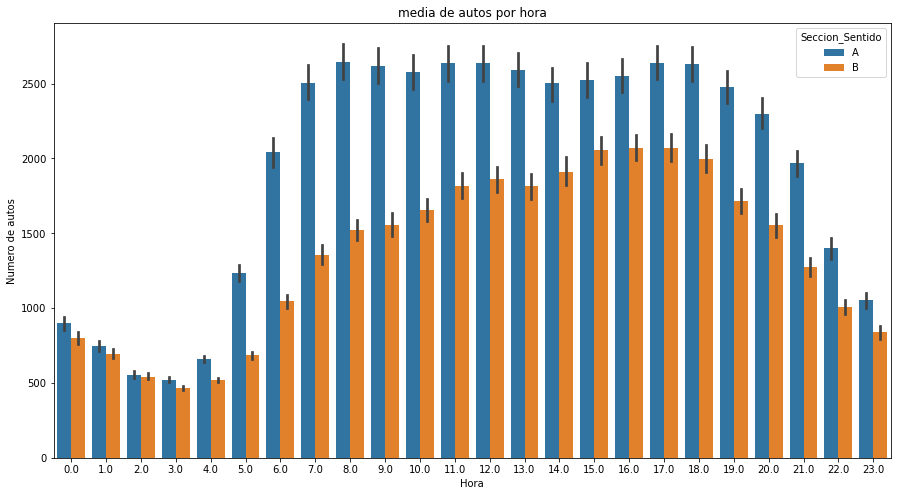

In [23]:
plt.figure(figsize = (15, 8))
sns.barplot(data = df,x='Hora', y='Cant_Veh',hue='Seccion_Sentido')
plt.xlabel('Hora')
plt.ylabel('Numero de autos')
plt.title('media de autos por hora')
# plt.xticks(rotation=45)
plt.show()

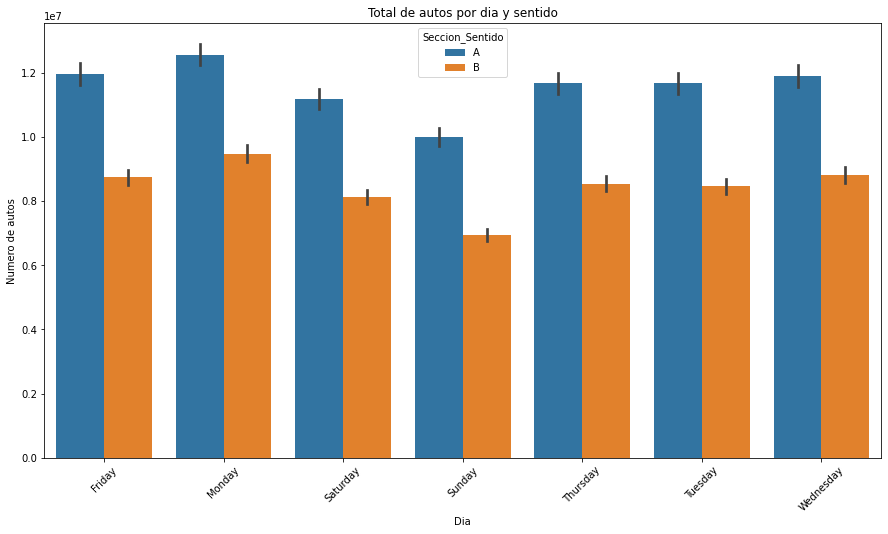

In [24]:
plt.figure(figsize = (15, 8))
sns.barplot(data = df,x='Dia', y='Cant_Veh',hue='Seccion_Sentido', estimator=sum)
plt.xlabel('Dia')
plt.ylabel('Numero de autos')
plt.title('Total de autos por dia y sentido')
plt.xticks(rotation=45)
plt.show()


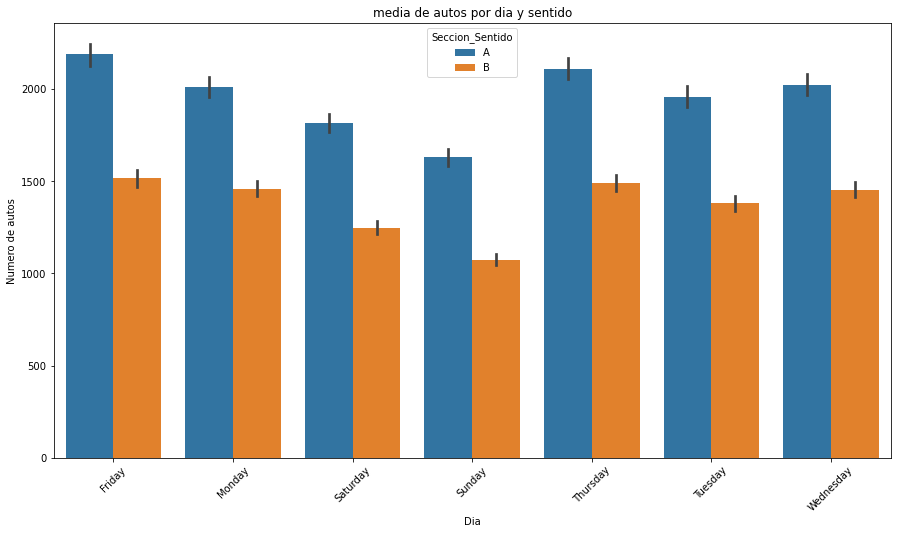

In [25]:
plt.figure(figsize = (15, 8))
sns.barplot(data = df,x='Dia', y='Cant_Veh',hue='Seccion_Sentido')
plt.xlabel('Dia')
plt.ylabel('Numero de autos')
plt.title('media de autos por dia y sentido')
plt.xticks(rotation=45)
plt.show()

In [26]:
df

,Fecha,Hora,Auto_Nombre,Dispo_Nombre,Dispo_Ubicacion,Seccion_Sentido,Disp_Lat,Disp_Lng,Cant_Veh,Dia,Mes
0,2022-01-01,0.0,AU 4 Lugones,RD165 Dorrego,4.74,A,-34.56336,-58.41529,654.000,Saturday,January
1,2022-01-01,1.0,AU 4 Lugones,RD165 Dorrego,4.74,A,-34.56336,-58.41529,2675.000,Saturday,January
2,2022-01-01,2.0,AU 4 Lugones,RD165 Dorrego,4.74,A,-34.56336,-58.41529,3260.000,Saturday,January
3,2022-01-01,3.0,AU 4 Lugones,RD165 Dorrego,4.74,A,-34.56336,-58.41529,2017.000,Saturday,January
4,2022-01-01,4.0,AU 4 Lugones,RD165 Dorrego,4.74,A,-34.56336,-58.41529,1152.000,Saturday,January
...,...,...,...,...,...,...,...,...,...,...,...
87119,2022-11-30,15.0,AU Dellepiane,RD113 Ingreso DELL2,4.60,A,-34.65061,-58.46643,1.685,Wednesday,November
87120,2022-11-30,16.0,AU Dellepiane,RD113 Ingreso DELL2,4.60,A,-34.65061,-58.46643,1.685,Wednesday,November
87121,2022-11-30,17.0,AU Dellepiane,RD113 Ingreso DELL2,4.60,A,-34.65061,-58.46643,1.685,Wednesday,November
87122,2022-11-30,18.0,AU Dellepiane,RD113 Ingreso DELL2,4.60,A,-34.65061,-58.46643,1.685,Wednesday,November


In [31]:
df.columns

Index(['Fecha', 'Hora', 'Auto_Nombre', 'Dispo_Nombre', 'Dispo_Ubicacion',
       'Seccion_Sentido', 'Disp_Lat', 'Disp_Lng', 'Cant_Veh', 'Dia', 'Mes'],
      dtype='object')

In [34]:
group = df.groupby(['Fecha', 'Hora','Mes','Dia','Dispo_Nombre']).agg({'Disp_Lat':'mean', 'Disp_Lng':'mean','Cant_Veh':'sum'}).reset_index().dropna()
group.describe()

,Disp_Lat,Disp_Lng,Cant_Veh
count,70113.000000,70113.000000,70113.000000
mean,-34.608620,-58.431643,1998.692982
std,0.052674,0.039155,2316.725626
min,-34.684110,-58.482640,1.685000
25%,-34.651360,-58.466770,8.413000
50%,-34.632600,-58.446400,922.685000
75%,-34.547780,-58.378250,3389.000000
max,-34.537090,-58.372550,11188.400000


In [35]:
group.sample(10)

,Fecha,Hora,Mes,Dia,Dispo_Nombre,Disp_Lat,Disp_Lng,Cant_Veh
767410,2022-02-13,22.0,February,Sunday,RD170 Udaondo,-34.54293,-58.44901,5814.000
2002385,2022-11-25,14.0,November,Friday,RD171 Esma,-34.56336,-58.45967,6.881
409357,2022-01-24,10.0,January,Monday,RD131 Brandsen B,-34.63898,-58.37695,1992.000
1549811,2022-10-30,16.0,October,Sunday,RD106 Zinny,-34.65465,-58.46901,2244.633
174206,2022-01-10,23.0,January,Monday,RD111 Ramal 9,-34.65061,-58.46677,190.000
938566,2022-02-23,17.0,February,Wednesday,RD168 Juramento,-34.54977,-58.43602,6102.400
2045361,2022-11-28,1.0,November,Monday,RD169 Monroe,-34.54977,-58.44224,1111.000
1393213,2022-10-21,17.0,October,Friday,RD106 Zinny,-34.65465,-58.46901,6964.000
404984,2022-01-24,4.0,January,Monday,RD125 Osv.Cruz A,-34.65134,-58.37255,675.000
392674,2022-01-23,11.0,January,Sunday,RD180 Encalada,-34.54778,-58.43848,1468.000


In [27]:
import numpy as np
fecha = df[['Disp_Lat','Disp_Lng','Cant_Veh','Fecha']]
fecha = fecha.groupby('Fecha')
array=[]
time_index=[]
for key, group in fecha:
    time_index.append(str(key))
    array.append(np.array(group[['Disp_Lat','Disp_Lng','Cant_Veh']]))
array = [i.tolist() for i in array]

In [30]:
# Mapas interactivos que muestren la ubicación de los dispositivos y su relación con la cantidad de vehículos
import folium
import folium.plugins as plugins
## creamos un mapa con folium que sea dinamico para ver el hotsplot por dia de nuestros datos.
m = folium.Map(location=[df["Disp_Lat"].mean(), df["Disp_Lng"].mean()], tiles="stamentoner", zoom_start=12)

hm = plugins.HeatMapWithTime(array, index=time_index, auto_play=True, max_opacity=0.3) #heatmap diario y con auto play

hm.add_to(m)# lo agregamos al mapa base

m # lo publicamos o mostramos



In [ ]:
fig, axes = plt.subplots(1,12, figsize=(40,40),sharex=True, sharey=True)
for fid, mes in enumerate(count_local.MES.unique()):
    meses = count_local[count_local['MES']==mes]
    axes[fid].set_title(mes)
    meses.plot(ax=axes[fid], column='CANTIDAD', cmap='BuPu', legend=True)